# Part 1: Basic Sequence-to-Sequence Models

## Welcome!

Learn how computers translate sentences from one language to another by building a simple translation system.

**What you'll learn:**
- What word vectors look like (3D visualization!)
- How the tanh activation works
- How encoders compress meaning
- How decoders expand meaning
- The bottleneck problem

**Time: 20 minutes**

---

## 1. The Challenge: Variable-Length Sentences

Translating sentences is hard because they have different lengths:

| English | Length | French | Length |
|---------|--------|--------|--------|
| Hello | 1 word | Bonjour | 1 word |
| The cat sat | 3 words | Le chat s'est assis | 4 words |
| I love machine learning | 4 words | J'aime l'apprentissage automatique | 3 words |

**The problem:**
- Input: ANY length (1, 3, 10, 100 words...)
- Output: ANY length (might be shorter OR longer!)
- Must preserve meaning

**The solution:** Encoder-Decoder architecture

```
Variable Input  →  [ENCODER]  →  Fixed Context Vector  →  [DECODER]  →  Variable Output
"The cat sat"       compress        [0.2, -0.1, ...]       expand        "Le chat assis"
```

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
print("Ready to build a translator!")

Ready to build a translator!


## 2. Understanding Word Vectors (3D Visualization)

Before we build the encoder, let's understand what **word vectors** are!

Each word is represented as a **point in space**. Similar words are close together.

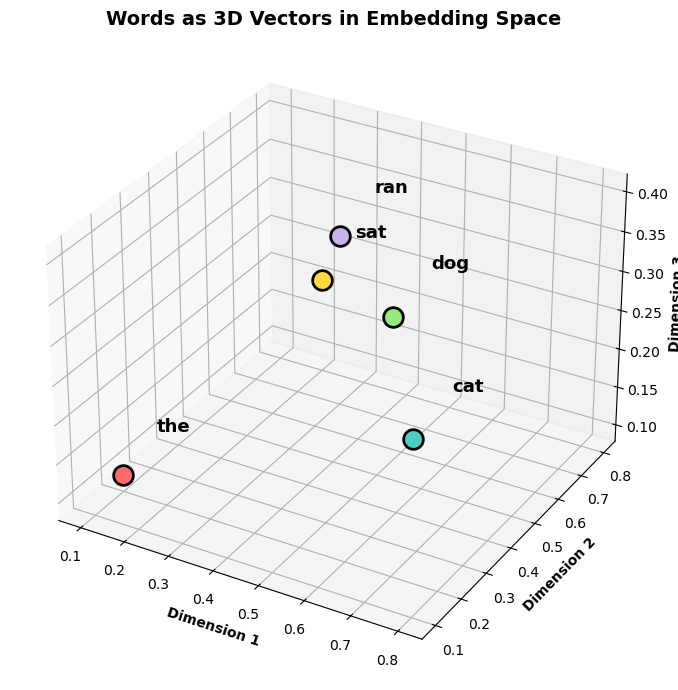


Key Insights:
- Each word = a point in 3D space
- Similar words cluster: (cat, dog) and (sat, ran)
- Real models use 100-300 dimensions!
- These vectors capture word meaning


In [30]:
# Simple 3D word embeddings (3 dimensions for visualization)
embeddings_3d = {
    'the': [0.1, 0.2, 0.1],
    'cat': [0.8, 0.1, 0.3],
    'dog': [0.7, 0.2, 0.4],
    'sat': [0.2, 0.8, 0.2],
    'ran': [0.3, 0.7, 0.3],
}

# Plot in 3D
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['#FF6B6B', '#4ECDC4', '#95E77E', '#FFD93D', '#C7B3E5']
for (word, vec), color in zip(embeddings_3d.items(), colors):
    ax.scatter(vec[0], vec[1], vec[2], s=200, c=color, edgecolors='black', linewidth=2)
    ax.text(vec[0]+0.05, vec[1]+0.05, vec[2]+0.05, word, fontsize=13, fontweight='bold')

ax.set_xlabel('Dimension 1', fontweight='bold')
ax.set_ylabel('Dimension 2', fontweight='bold')
ax.set_zlabel('Dimension 3', fontweight='bold')
ax.set_title('Words as 3D Vectors in Embedding Space', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Each word = a point in 3D space")
print("- Similar words cluster: (cat, dog) and (sat, ran)")
print("- Real models use 100-300 dimensions!")
print("- These vectors capture word meaning")

## 3. The Tanh Activation Function

The encoder uses `tanh` to update hidden states. Let's see what it does!

**Purpose**: Squashes any value into range [-1, 1], keeping hidden states bounded.

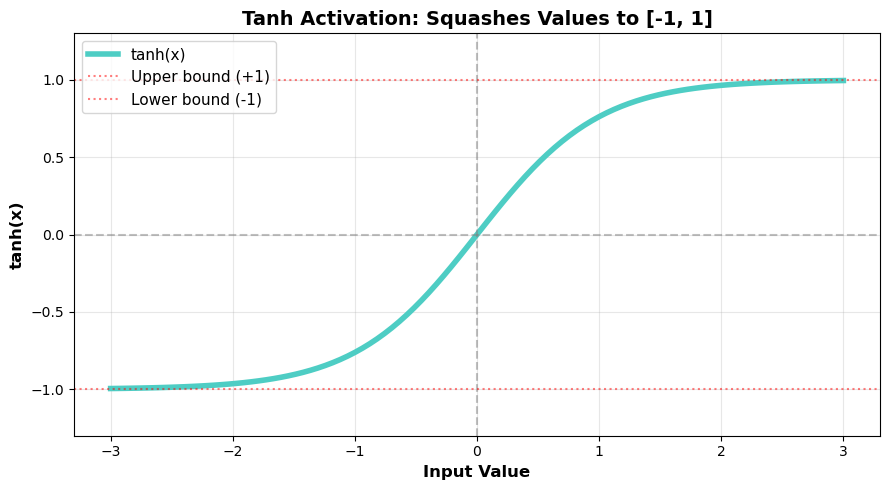


Tanh Properties:
- Input: any value (-∞ to +∞)
- Output: always between -1 and 1
- S-shaped curve (smooth, differentiable)
- Prevents hidden states from exploding

Example: tanh(0.5) = 0.462
         tanh(5.0) = 1.000 ← saturates near 1


In [31]:
# Plot tanh function
x = np.linspace(-3, 3, 100)
y = np.tanh(x)

plt.figure(figsize=(9, 5))
plt.plot(x, y, linewidth=4, color='#4ECDC4', label='tanh(x)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='red', linestyle=':', alpha=0.5, label='Upper bound (+1)')
plt.axhline(y=-1, color='red', linestyle=':', alpha=0.5, label='Lower bound (-1)')
plt.grid(True, alpha=0.3)
plt.xlabel('Input Value', fontsize=12, fontweight='bold')
plt.ylabel('tanh(x)', fontsize=12, fontweight='bold')
plt.title('Tanh Activation: Squashes Values to [-1, 1]', fontsize=14, fontweight='bold')
plt.ylim(-1.3, 1.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\nTanh Properties:")
print("- Input: any value (-∞ to +∞)")
print("- Output: always between -1 and 1")
print("- S-shaped curve (smooth, differentiable)")
print("- Prevents hidden states from exploding")
print("\nExample: tanh(0.5) =", f"{np.tanh(0.5):.3f}")
print("         tanh(5.0) =", f"{np.tanh(5.0):.3f}", "← saturates near 1")

## 4. Building a Simple Encoder

Now you understand **word vectors** and **tanh**! Let's build the encoder.

The encoder **reads** the input sentence word-by-word and **compresses** it into a context vector.

### How it works:
1. Start with empty hidden state: `h = [0, 0, 0, ...]`
2. For each word, update: `h = tanh(h + word_vector)`
3. Final hidden state = context vector

In [36]:
def encode_sentence(words, hidden_dim=3):
    """
    Encode a sentence into a context vector
    """
    # Start with empty hidden state
    hidden = np.zeros(hidden_dim)
    all_states = []
    
    print(f"\nEncoding: '{' '.join(words)}'")
    print("="*50)
    
    for i, word in enumerate(words):
        # Get word vector (random for demo - in reality, learned from data)
        word_vec = np.random.randn(hidden_dim) * 0.3
        old_hidden = hidden
        # Update hidden state with tanh
        hidden = np.tanh(hidden + word_vec)
        all_states.append(hidden.copy())
        print(f"Step {i+1}: Read '{word}'")
        print(f"  Old Hidden: [{old_hidden[0]:.2f}, {old_hidden[1]:.2f}, {old_hidden[2]:.2f}, ...]")
        print(f"  Word: [{word_vec[0]:.2f}, {word_vec[1]:.2f}, {word_vec[2]:.2f}, ...]")
        print(f"  Old Hidden + Word: [{word_vec[0]+old_hidden[0]:.2f}, {word_vec[1]+old_hidden[1]:.2f}, {word_vec[2]+old_hidden[2]:.2f}, ...]")
        
        print(f"  New Hidden: [{hidden[0]:.2f}, {hidden[1]:.2f}, {hidden[2]:.2f}, ...]")
    
    print("\n" + "="*50)
    print(f"Context vector created! Shape: {hidden.shape}")
    print(f"This vector represents the entire sentence.")
    
    return hidden, np.array(all_states)

# Test it!
context, states = encode_sentence(['the', 'cat', 'sat'])


Encoding: 'the cat sat'
Step 1: Read 'the'
  Old Hidden: [0.00, 0.00, 0.00, ...]
  Word: [0.06, -0.59, -0.40, ...]
  Old Hidden + Word: [0.06, -0.59, -0.40, ...]
  New Hidden: [0.06, -0.53, -0.38, ...]
Step 2: Read 'cat'
  Old Hidden: [0.06, -0.53, -0.38, ...]
  Word: [0.06, 0.22, 0.05, ...]
  Old Hidden + Word: [0.12, -0.31, -0.33, ...]
  New Hidden: [0.12, -0.30, -0.32, ...]
Step 3: Read 'sat'
  Old Hidden: [0.12, -0.30, -0.32, ...]
  Word: [-0.03, -0.09, -0.44, ...]
  Old Hidden + Word: [0.09, -0.39, -0.76, ...]
  New Hidden: [0.09, -0.37, -0.64, ...]

Context vector created! Shape: (3,)
This vector represents the entire sentence.


In [17]:
context

array([-0.08438821, -0.5182254 , -0.17071548])

### Visualizing the Encoding Journey (3D Trajectory)

Let's see the encoding as a **journey through 3D space**!

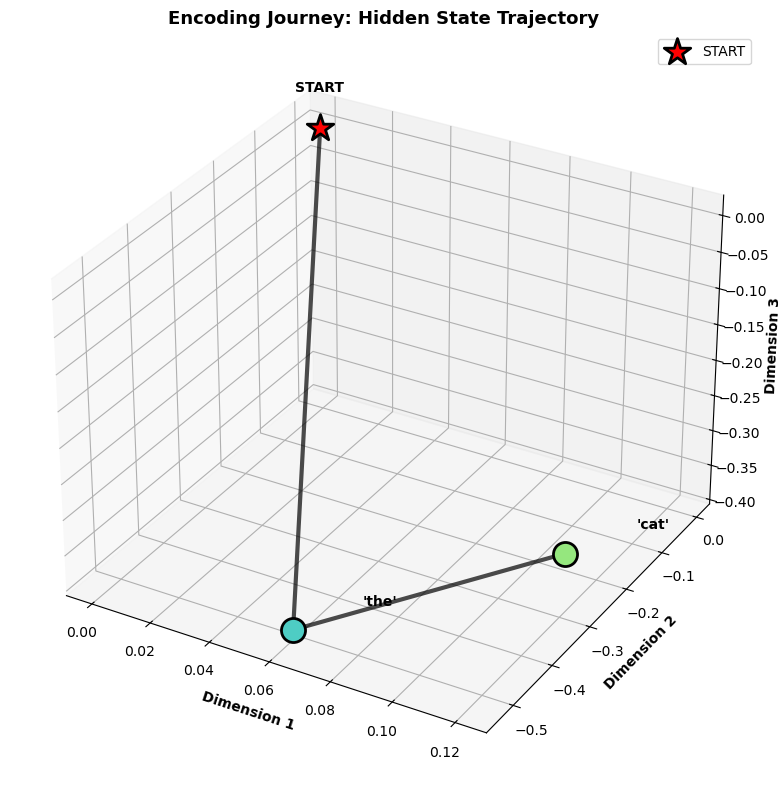

What you're seeing:
- RED star = start (0,0,0)
- Each dot = hidden state after reading a word
- Black lines = the journey path
- YELLOW = final context vector
Encoding is a JOURNEY through space!


<Figure size 640x480 with 0 Axes>

What you're seeing:
- RED star = start (0,0,0)
- Each dot = hidden state after reading a word
- Black lines = the journey path
- YELLOW = final context vector
Encoding is a JOURNEY through space!


In [40]:
# Visualize encoding as 3D trajectory
words_encoded = ['the', 'cat', 'sat']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Start (origin)
ax.scatter(0, 0, 0, s=400, c='red', marker='*', edgecolors='black', linewidth=2, label='START', zorder=10)
ax.text(0, 0, 0.05, 'START', fontsize=10, fontweight='bold', ha='center')
# Plot trajectory
colors = ['#4ECDC4', '#95E77E', '#FFD93D']
for i in range(len(states)):    
    ax.scatter(states[i,0], states[i,1], states[i,2], s=300, c=colors[i], edgecolors='black', linewidth=2)    
    ax.text(states[i,0]+0.02, states[i,1]+0.02, states[i,2]+0.05, f"'{words_encoded[i]}'", fontsize=10, fontweight='bold')        
    # Draw path    
    if i == 0:        
        ax.plot([0, states[i,0]], [0, states[i,1]], [0, states[i,2]], 'k-', linewidth=3, alpha=0.7)    
    else:        
        ax.plot([states[i-1,0], states[i,0]], [states[i-1,1], states[i,1]], [states[i-1,2], states[i,2]], 'k-', linewidth=3, alpha=0.7)
        # Mark context vector
        ax.text(states[-1,0], states[-1,1], states[-1,2]-0.15, 'CONTEXT', ha='center', fontsize=9, fontweight='bold',       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8, edgecolor='black'))
        ax.set_xlabel('Dimension 1', fontweight='bold')
        ax.set_ylabel('Dimension 2', fontweight='bold')
        ax.set_zlabel('Dimension 3', fontweight='bold')
        ax.set_title('Encoding Journey: Hidden State Trajectory', fontsize=13, fontweight='bold')
        ax.legend()
        plt.tight_layout()
        plt.show()
        print("What you're seeing:")
        print("- RED star = start (0,0,0)")
        print("- Each dot = hidden state after reading a word")
        print("- Black lines = the journey path")
        print("- YELLOW = final context vector")
        print("Encoding is a JOURNEY through space!")

## 5. Building a Simple Decoder

The decoder **takes** the context vector and **expands** it into a translation.

### How it works:
1. Start with context vector as hidden state
2. Generate one word at a time
3. Use previous word to generate next word
4. Stop at END token

In [43]:
def decode_sentence(context_vector, max_length=10):
    """
    Generate a translation from the context vector
    """
    vocab = ['le', 'chat', 'assis', 'sur', 'tapis', '<END>']
    hidden = context_vector.copy()
    output = []
    
    print("\nDecoding (generating translation):")
    print("="*50)
    
    for step in range(max_length):
        # Calculate word scores (simplified)
        scores = np.dot(np.random.randn(len(vocab), len(hidden)) * 0.3, hidden)
        
        # Convert to probabilities
        probs = np.exp(scores) / np.sum(np.exp(scores))
        
        # Pick best word
        word_idx = np.argmax(probs)
        word = vocab[word_idx]
        
        print(f"Step {step+1}: Generated '{word}' (prob: {probs[word_idx]:.2f})")
        
        if word == '<END>':
            break
        
        output.append(word)
        hidden = np.tanh(hidden + np.random.randn(len(hidden)) * 0.1)
    
    print("="*50)
    return output

# Test it!
translation = decode_sentence(context)
print(f"\nTranslation: {' '.join(translation)}")
print("\nNote: Random output - model not trained!")


Decoding (generating translation):
Step 1: Generated 'tapis' (prob: 0.23)
Step 2: Generated 'chat' (prob: 0.19)
Step 3: Generated 'tapis' (prob: 0.20)
Step 4: Generated 'chat' (prob: 0.20)
Step 5: Generated 'sur' (prob: 0.23)
Step 6: Generated 'sur' (prob: 0.20)
Step 7: Generated 'tapis' (prob: 0.19)
Step 8: Generated 'assis' (prob: 0.19)
Step 9: Generated 'sur' (prob: 0.18)
Step 10: Generated '<END>' (prob: 0.19)

Translation: tapis chat tapis chat sur sur tapis assis sur

Note: Random output - model not trained!


## 6. Complete Translation Example

Let's put encoder and decoder together:

In [ ]:
def translate(input_sentence):
    """
    Complete translation pipeline
    """
    print("\n" + "#"*60)
    print(f"# INPUT: {' '.join(input_sentence)}")
    print("#"*60)
    
    # Encode
    context, _ = encode_sentence(input_sentence)
    
    # Decode
    output = decode_sentence(context)
    
    print("\n" + "#"*60)
    print(f"# OUTPUT: {' '.join(output)}")
    print("#"*60)
    
    return output

# Try different sentences
translate(['the', 'cat', 'sat'])
translate(['hello', 'world'])

## 7. The Bottleneck Problem

### The Big Issue

All information must fit in ONE fixed-size context vector!

```
Short sentence:  "Hi" (2 chars)  →  Context [8 numbers]  →  "Salut" ✓ Works!

Long sentence:   "The artificial intelligence research..."  (50 words)
                 ↓
              Context [8 numbers]  ← SAME SIZE!
                 ↓
              Translation ???  ✗ Lost information!
```

### Why This Fails

Imagine summarizing a 500-page book with one sentence. You'd lose details!

Same problem here:
- 50 input words → compressed into 8 numbers → 50 output words
- Later words get "forgotten"
- Decoder can't "look back" at specific input words

**Solution:** Attention mechanism (Part 2!)

## 8. Key Takeaways

### What You Learned

1. **Word Vectors**: Words are points in space (saw 3D visualization!)

2. **Tanh Function**: Squashes values to [-1, 1], prevents explosion

3. **Encoder**: Compresses input into fixed-size context vector
   ```python
   hidden = tanh(hidden + word_vector)  # Update for each word
   ```

4. **Decoder**: Expands context vector into output sequence
   ```python
   word = argmax(softmax(scores))  # Pick best word
   ```

5. **Bottleneck**: Fixed context size limits performance on long sentences

### The Problem

```
Input (50 words) → [Squeeze into 8 numbers] → Output (50 words)
                         ↑
                    BOTTLENECK!
```

### What's Next?

**Part 2: Attention Mechanism**
- Let decoder look at ALL encoder states
- Custom context for each output word
- Solves the bottleneck!

---

## Try It Yourself

In [ ]:
# Experiment: Try your own sentence!
my_sentence = ['the', 'dog', 'runs', 'fast']  # Change this!

translate(my_sentence)

# Questions to think about:
# 1. What happens with longer sentences?
# 2. Where does information get lost?
# 3. How could we fix the bottleneck?